<a href="https://colab.research.google.com/github/FranciscoTeon/Video-game-ratings-best-to-worst-Data-Analysis/blob/main/IMDB_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from sklearn.cluster import KMeans

In [2]:
imdb_df = pd.read_csv('imdb_df.csv')
imdb_df.head()

,title,year,genre,rating,votes,directors,plot
0,The Last of Us: Part I,2022.0,"Action, Adventure, Drama",9.8,601,"Matthew Gallant, Bruce Straley",Experience the emotional storytelling and unfo...
1,Red Dead Redemption II,2018.0,"Action, Adventure, Crime",9.7,36441,Missing,Amidst the decline of the Wild West at the tur...
2,The Witcher 3: Wild Hunt - Blood and Wine,2016.0,"Action, Adventure, Drama",9.7,7610,Konrad Tomaszkiewicz,Geralt is in the southern province of Toussain...
3,The Witcher 3: Wild Hunt,2015.0,"Action, Adventure, Drama",9.7,26328,Konrad Tomaszkiewicz,A monster hunter for hire embarks on an epic j...
4,The Last of Us,2013.0,"Action, Adventure, Drama",9.7,61103,"Neil Druckmann, Bruce Straley","In a hostile, post-pandemic world, Joel and El..."


In [3]:
class CustomKMeans:
    def __init__(self, k):
        self.k = k
        self.kmeans = KMeans(n_clusters=self.k)

    def fit(self, data):
        #Fits the KMeans model to the data
        self.kmeans.fit(data)

    def predict(self, data):
        #Predicts the cluster for each sample in the data
        return self.kmeans.predict(data)

    def get_labels(self):
        #Returns the cluster labels
        return self.kmeans.labels_

        #sse method
    def get_cluster_centers(self):
        #Returns the cluster center
        return self.kmeans.cluster_centers_

In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
imdb_df['genre_encoded'] = label_encoder.fit_transform(imdb_df['genre'])

imdb_df['genre_encoded'] = imdb_df['genre_encoded'].astype(float)

predict:  [2 2 2 ... 1 0 0]
labels [2 2 2 ... 1 0 0]
Cluster centers:  [[  6.98603958 123.44293847]
 [  6.73323519 342.37246964]
 [  7.01676461  10.51616063]]


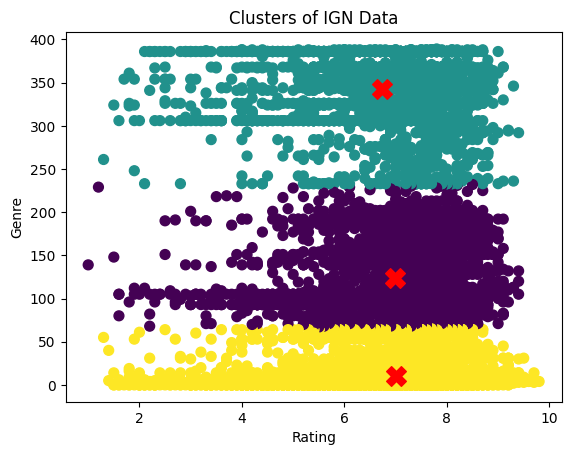

In [11]:
# Implement the k-means algorithm on your dataset
custom_kmeans = CustomKMeans(k=3)
custom_kmeans.fit(imdb_df[['rating', 'genre_encoded']])
predict = custom_kmeans.predict(imdb_df[['rating', 'genre_encoded']])
labels = custom_kmeans.get_labels()
get_cluster = custom_kmeans.get_cluster_centers()

print('predict: ', predict)
print('labels', labels)
print('Cluster centers: ', get_cluster)

plt.scatter(imdb_df['rating'], imdb_df['genre_encoded'], c=predict, s=50, cmap='viridis')
plt.scatter(get_cluster[:, 0], get_cluster[:, 1], s=200, c='red', marker='X')
plt.xlabel('Rating')
plt.ylabel('Genre')
plt.title('Clusters of IGN Data')
plt.show()

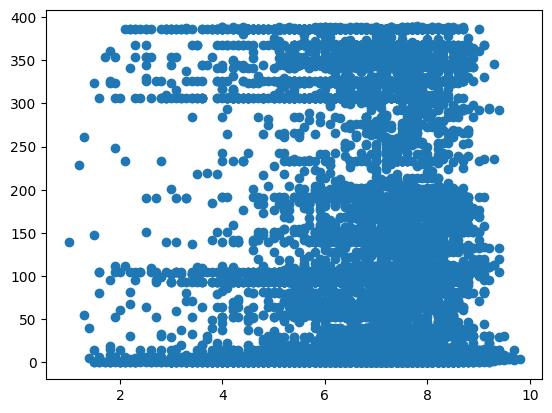

In [6]:
#Select a set of columns to cluster over
plt.scatter(imdb_df["rating"], imdb_df["genre_encoded"])
plt.show()

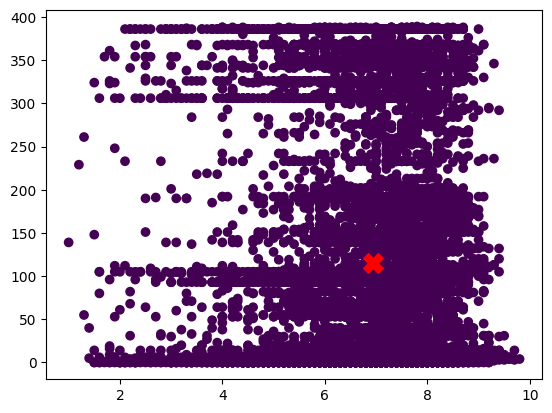

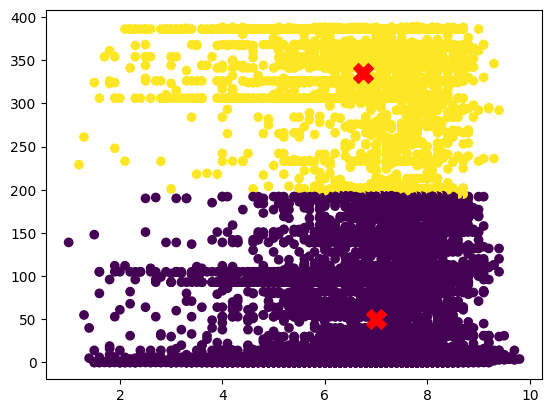

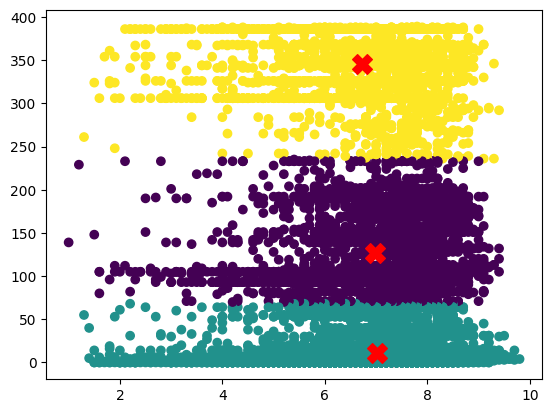

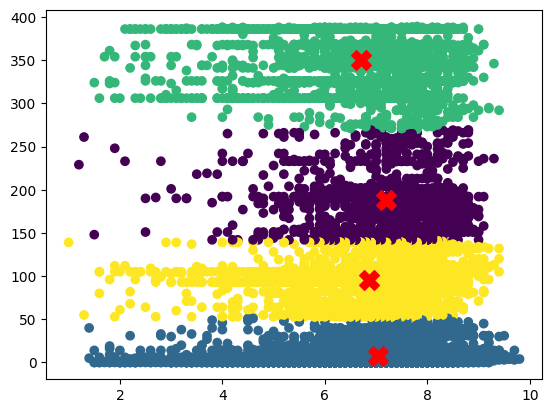

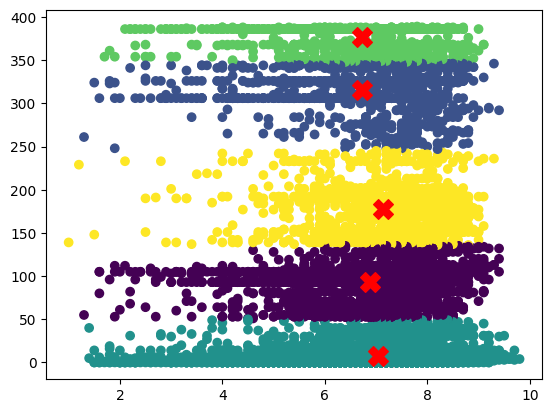

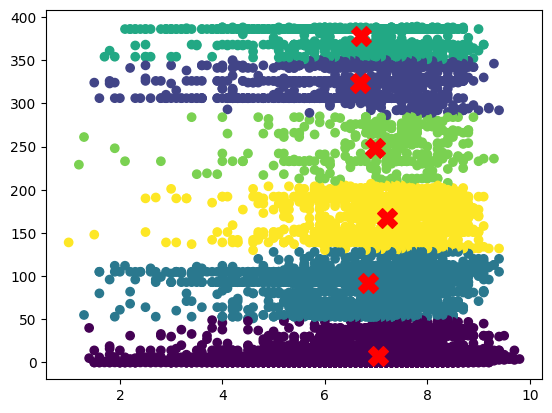

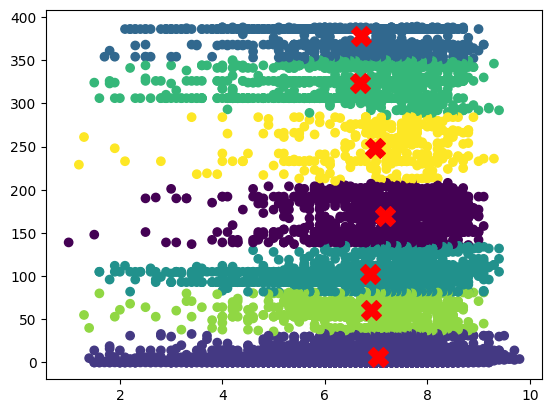

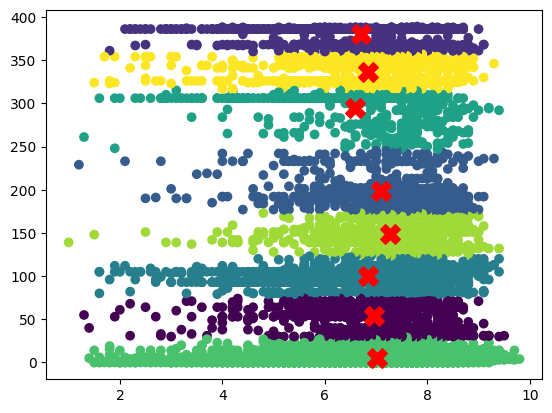

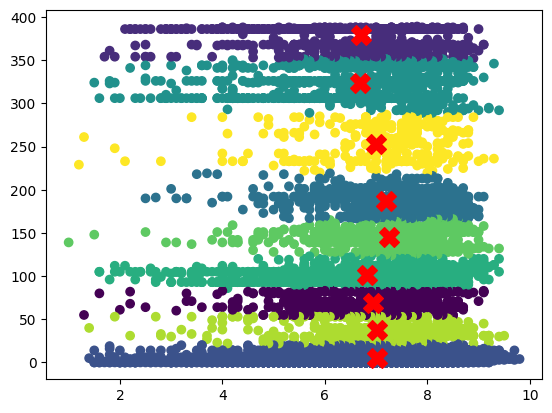

In [7]:
# Run your clustering algorithm and try several k values
def plot_clusters(imdb_df, custom_kmeans):
    plt.scatter(imdb_df["rating"], imdb_df["genre_encoded"], c=custom_kmeans.get_labels(), cmap='viridis')
    plt.scatter(custom_kmeans.get_cluster_centers()[:, 0], custom_kmeans.get_cluster_centers()[:, 1], s=200, c='red', marker='X')

for i in range(1,10):
    custom_kmeans = CustomKMeans(i)
    custom_kmeans.fit(imdb_df[['rating', 'genre_encoded']])
    custom_kmeans.predict(imdb_df[['rating', 'genre_encoded']])
    plot_clusters(imdb_df, custom_kmeans)
    plt.show()

Cluster centers:  [[  6.98188639 126.21623794]
 [  6.73185606 345.55340909]
 [  7.01654221  10.83262987]]
Inertia:  11740302.644286102


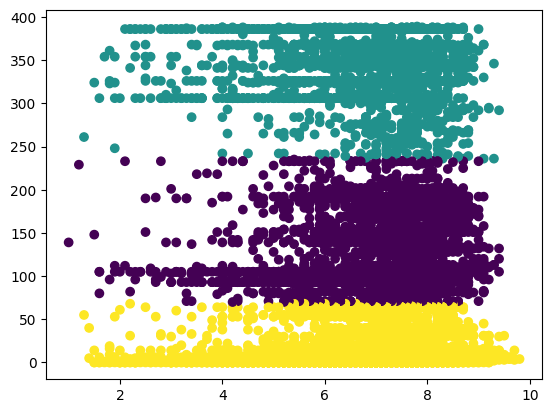

In [8]:
# Run the sklearn KMeans algorithm and see if you get same or similar results
km = KMeans(n_clusters=3)
km = km.fit(imdb_df[['rating', 'genre_encoded']])
km.predict(imdb_df[['rating', 'genre_encoded']])
print('Cluster centers: ', km.cluster_centers_)
print('Inertia: ', km.inertia_)

plt.scatter(imdb_df["rating"], imdb_df["genre_encoded"], c=km.labels_)
plt.show()

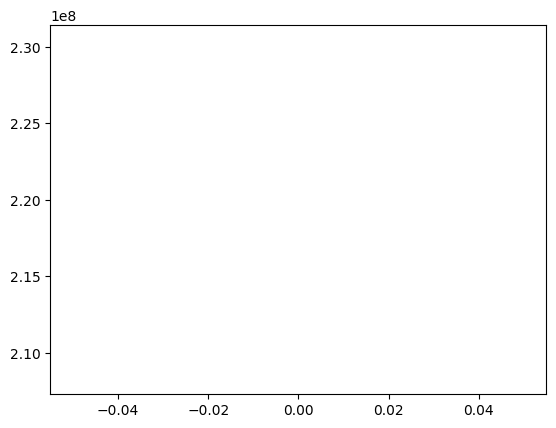

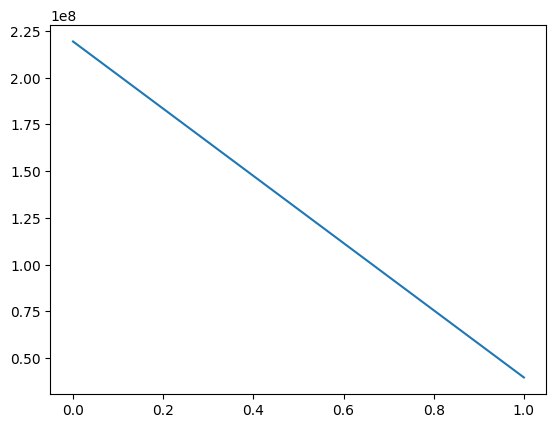

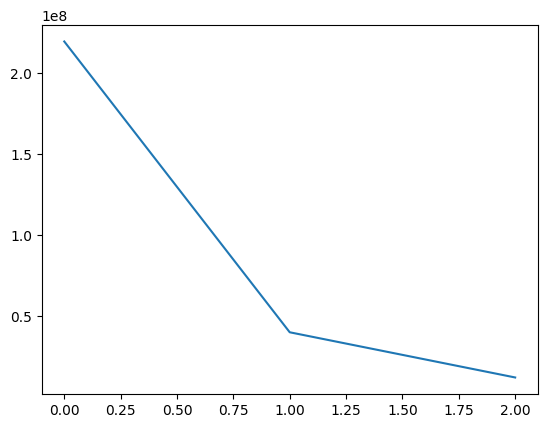

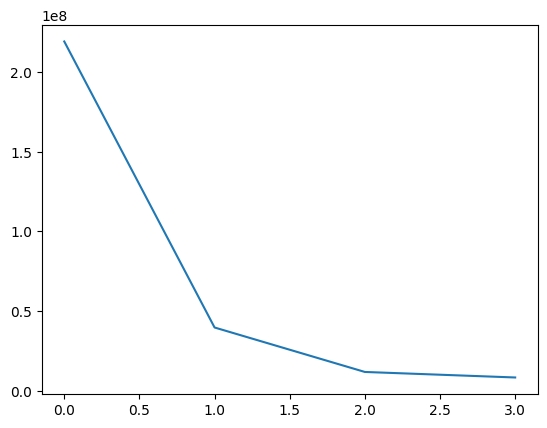

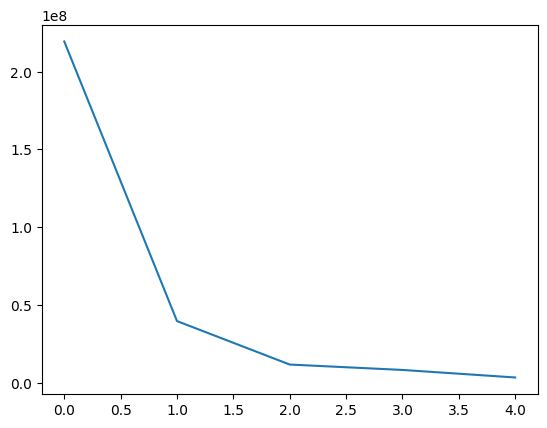

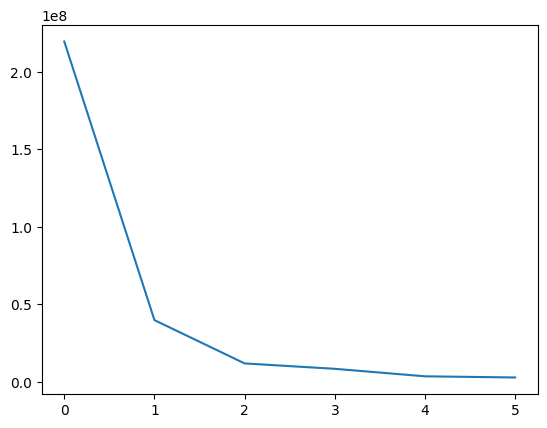

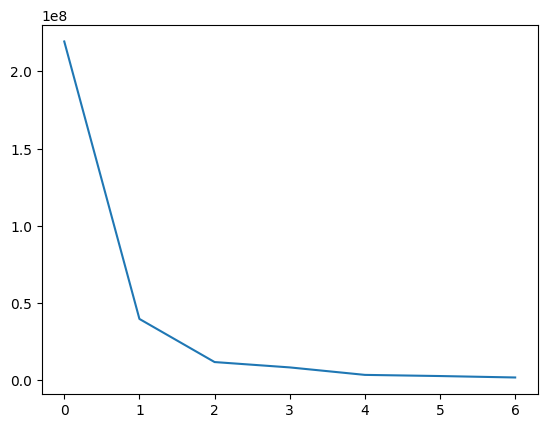

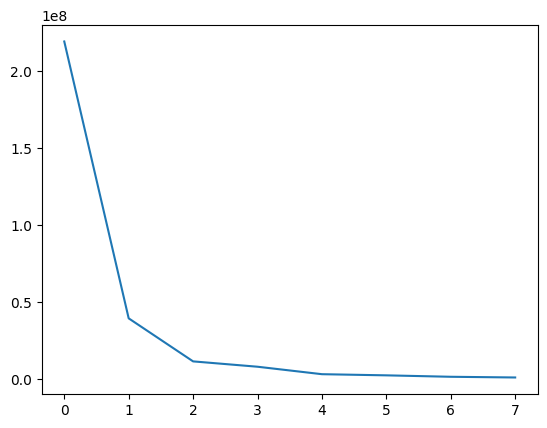

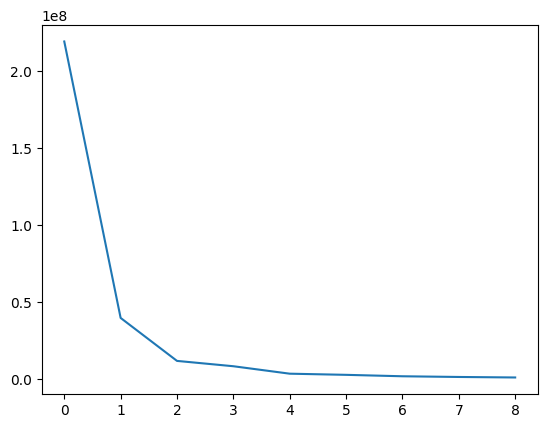

In [9]:
# What k value is works best?
#It seems like k value of 1 works best based off the graphs
inertia = []
for i in range(1,10):
  km = KMeans(n_clusters=i)
  km = km.fit(imdb_df[['rating', 'genre_encoded']])
  km.predict(imdb_df[['rating', 'genre_encoded']])
  inertia.append(km.inertia_)

  plt.plot(inertia)
  plt.show()